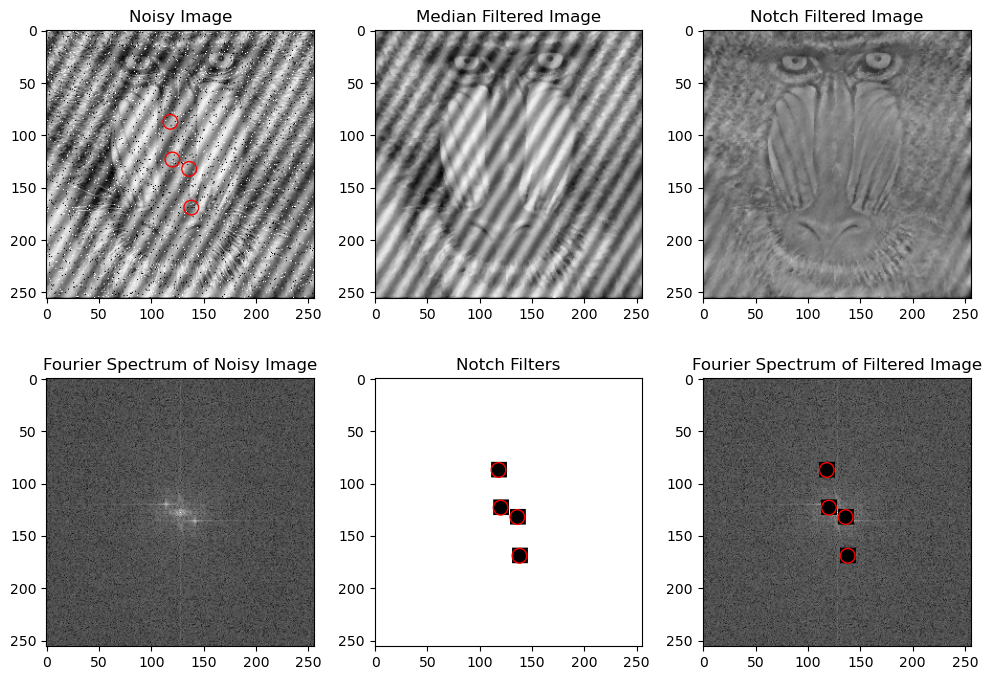

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy.ndimage import median_filter



def create_notch_filter(image_shape, noise_points, notch_radius):
    # Create an array of ones with the same shape as the image
    im5 = np.ones(image_shape)
    # Set the pixels around the noise points to zero to create the notch filter
    for point in noise_points:
        x, y = point
        im5[
            x - notch_radius : x + notch_radius + 1,
            y - notch_radius : y + notch_radius + 1,
        ] = 0
    return im5


def apply_notch_filter(image, notch_filter):
    # Shift and compute the 2D Fourier transform of the image
    im4 = fftpack.fftshift(fftpack.fft2(image))
    # Apply the notch filter to the Fourier spectrum
    im6 = im4 * notch_filter
    # Compute the inverse Fourier transform and shift back
    return np.abs(fftpack.ifft2(fftpack.ifftshift(im6)))


# Load the noisy input image (im1)
im1 = plt.imread("photos\image7noise.png")

# Apply median filter to im1 (im2)
im2 = median_filter(im1, size=3)

# Compute the shifted Fourier spectrum of im1 (im4)
im4 = fftpack.fftshift(fftpack.fft2(im1))

# Define the noise points and notch filter radius
noise_points = [(87, 118), (123, 120), (132, 136), (169, 138)]
notch_radius = 7

# Create the custom notch filter (im5)
im5 = create_notch_filter(im4.shape, noise_points, notch_radius)

# Apply the notch filter to the Fourier spectrum of im1 (im6)
im3 = apply_notch_filter(im2, im5)

# Plotting the figure
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes[0, 0].imshow(im1, cmap="gray")
axes[0, 0].set_title("Noisy Image")

axes[0, 1].imshow(im2, cmap="gray")
axes[0, 1].set_title("Median Filtered Image")

axes[0, 2].imshow(im3, cmap="gray")
axes[0, 2].set_title("Notch Filtered Image")

axes[1, 0].imshow(np.log(1 + np.abs(im4)), cmap="gray")
axes[1, 0].set_title("Fourier Spectrum of Noisy Image")

axes[1, 1].imshow(np.log(1 + np.abs(im5)), cmap="gray")
axes[1, 1].set_title("Notch Filters")

axes[1, 2].imshow(np.log(1 + np.abs(im4 * im5)), cmap="gray")
axes[1, 2].set_title("Fourier Spectrum of Filtered Image")

# Mark noise points as circles on the images
for point in noise_points:
    x, y = point
    axes[0, 0].add_patch(plt.Circle((y, x), notch_radius, color="r", fill=False))
    axes[1, 2].add_patch(plt.Circle((y, x), notch_radius, color="r", fill=False))
    axes[1, 1].add_patch(plt.Circle((y, x), notch_radius, color="r", fill=False))

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()


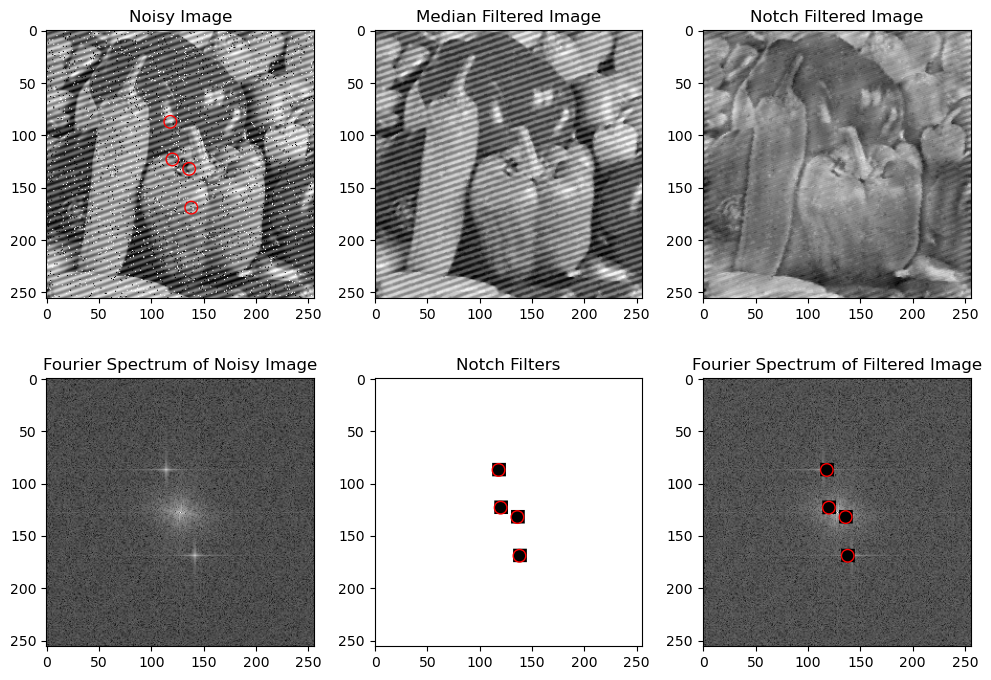

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy.ndimage import median_filter



def create_notch_filter(image_shape, noise_points, notch_radius):
    # Create an array of ones with the same shape as the image
    im5 = np.ones(image_shape)
    # Set the pixels around the noise points to zero to create the notch filter
    for point in noise_points:
        x, y = point
        im5[
            x - notch_radius : x + notch_radius + 1,
            y - notch_radius : y + notch_radius + 1,
        ] = 0
    return im5


def apply_notch_filter(image, notch_filter):
    # Shift and compute the 2D Fourier transform of the image
    im4 = fftpack.fftshift(fftpack.fft2(image))
    # Apply the notch filter to the Fourier spectrum
    im6 = im4 * notch_filter
    # Compute the inverse Fourier transform and shift back
    return np.abs(fftpack.ifft2(fftpack.ifftshift(im6)))


# Load the noisy input image (im1)
im1 = plt.imread("photos/image30noise.png")

# Apply median filter to im1 (im2)
im2 = median_filter(im1, size=3)

# Compute the shifted Fourier spectrum of im1 (im4)
im4 = fftpack.fftshift(fftpack.fft2(im1))

# Define the noise points and notch filter radius
noise_points = [(87, 118), (123, 120), (132, 136), (169, 138)]
notch_radius = 6

# Create the custom notch filter (im5)
im5 = create_notch_filter(im4.shape, noise_points, notch_radius)

# Apply the notch filter to the Fourier spectrum of im1 (im6)
im3 = apply_notch_filter(im2, im5)

# Plotting the figure
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes[0, 0].imshow(im1, cmap="gray")
axes[0, 0].set_title("Noisy Image")

axes[0, 1].imshow(im2, cmap="gray")
axes[0, 1].set_title("Median Filtered Image")

axes[0, 2].imshow(im3, cmap="gray")
axes[0, 2].set_title("Notch Filtered Image")

axes[1, 0].imshow(np.log(1 + np.abs(im4)), cmap="gray")
axes[1, 0].set_title("Fourier Spectrum of Noisy Image")

axes[1, 1].imshow(np.log(1 + np.abs(im5)), cmap="gray")
axes[1, 1].set_title("Notch Filters")

axes[1, 2].imshow(np.log(1 + np.abs(im4 * im5)), cmap="gray")
axes[1, 2].set_title("Fourier Spectrum of Filtered Image")

# Mark noise points as circles on the images
for point in noise_points:
    x, y = point
    axes[0, 0].add_patch(plt.Circle((y, x), notch_radius, color="r", fill=False))
    axes[1, 2].add_patch(plt.Circle((y, x), notch_radius, color="r", fill=False))
    axes[1, 1].add_patch(plt.Circle((y, x), notch_radius, color="r", fill=False))

plt.subplots_adjust(wspace=0.2, hspace=0.3)
plt.show()
